In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

#Carregando a imagem
path = 'Little Red Riding Hood.jpg'
img = cv2.imread(path)

img_height = img.shape[0]
img_width = img.shape[1]

#Transformando em escala de cinza
gray = np.zeros(img.shape[:2], dtype = 'uint8')

for i in range(img_height):
    for j in range(img_width):
        gray[i][j] = sum(img[i][j])//3
        
cv2.imshow('Gray', gray)

#Fazendo o histograma da imagem
hist = [0] * 256

for i in range(img_height):
    for j in range(img_width):
        px = gray[i][j]
        hist[px] += 1 

pixel = 256*[0]
for i in range(256):
    pixel[i] = i

#Normalizando o histograma
normalized_hist = [0] * 256

n = img_height*img_width

for k in range(256):
        ndp = hist[k]
        normalized_hist[k] = ndp/n

pixel = 256*[0]
for i in range(256):
    pixel[i] = i
    
#Acumulando o histograma
ac_normalized_hist = [0] * 256

n = img_height*img_width

for k in range(256):
        ndp = hist[k]
        if k == 0:
            ac_normalized_hist[k] = ndp/n
        ac_normalized_hist[k] = ac_normalized_hist[k-1] + (ndp/n)

pixel = 256*[0]
for i in range(256):
    pixel[i] = i

#Equalizando o histograma
mapa = np.zeros(256)
for i in range(256):
    mapa[i] = round(ac_normalized_hist[i] * 255)

eq_img = np.zeros((img.shape[0], img.shape[1]), dtype=np.uint8)

for i in range(img_height):
    for j in range(img_width):
        eq_img[i][j] = mapa[gray[i][j]]

cv2.imshow('bal', eq_img)
cv2.waitKey()

-1

In [14]:
hist_normalizado_desejado = [0]*256
soma = 0
totalPixels = img_height*img_width

for i in range(128):
    hist_normalizado_desejado[i] = (1-(i/127))*(totalPixels/2)/64
for i in range(127,255):
    hist_normalizado_desejado[i+1] = -(1-(i/127))*(totalPixels/2)/64

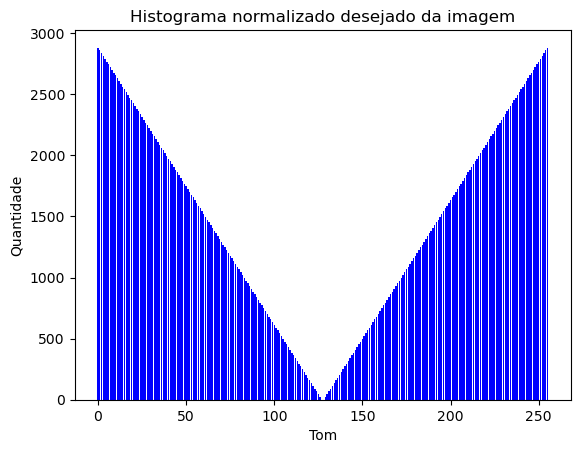

In [15]:
plt.xlabel('Tom')
plt.ylabel('Quantidade')
plt.title('Histograma normalizado desejado da imagem')

plt.bar(pixel, hist_normalizado_desejado, color = 'blue')
plt.show()

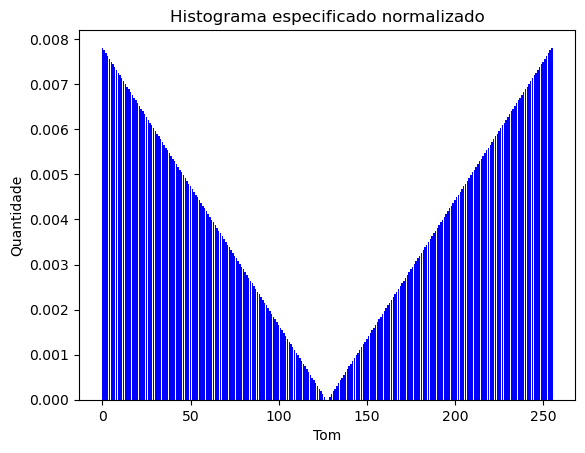

In [18]:
hist_especificado_normalizado = [0] * 256

n = img_height*img_width

for k in range(256):
        ndp = hist_normalizado_desejado[k]
        hist_especificado_normalizado[k] = ndp/n

plt.xlabel('Tom')
plt.ylabel('Quantidade')
plt.title('Histograma especificado normalizado')

plt.bar(pixel, hist_especificado_normalizado, color = 'blue')
plt.show()

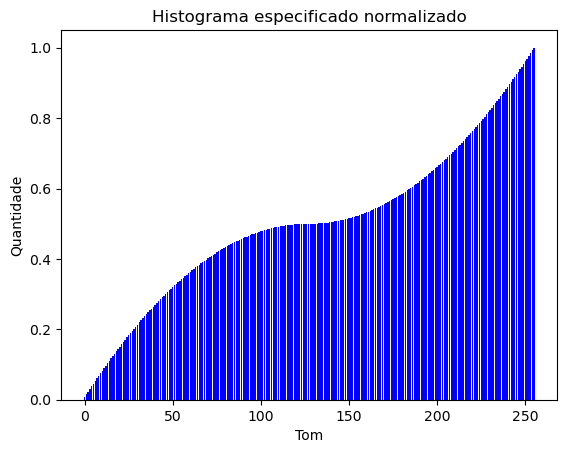

In [27]:
hist_especificado_normalizado_acumulado = [0] * 256

n = img_height*img_width

for k in range(256):
        ndp = hist_normalizado_desejado[k]
        if k == 0:
            hist_especificado_normalizado_acumulado[k] = ndp/n
        hist_especificado_normalizado_acumulado[k] = hist_especificado_normalizado_acumulado[k-1] + (ndp/n)
        
plt.xlabel('Tom')
plt.ylabel('Quantidade')
plt.title('Histograma especificado normalizado')

plt.bar(pixel, hist_especificado_normalizado_acumulado, color = 'blue')
plt.show()

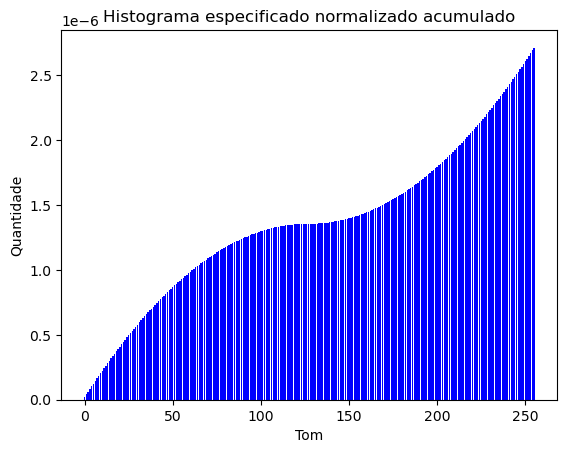

In [24]:
nv_cinza_hist_especificado_normalizado_acumulado = hist_especificado_normalizado_acumulado*256


plt.xlabel('Tom')
plt.ylabel('Quantidade')
plt.title('Histograma especificado normalizado acumulado')

plt.bar(pixel, hist_especificado_normalizado_acumulado, color = 'blue')
plt.show()